In [47]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN


# Logistic Regression Model

We test Logistic Regression with the same features as in the First Model notebook, and see the result.

In [48]:
df_num = pd.read_csv('./df_num.csv')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [49]:
df_num

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,contract_MtoM,contract_OneYear,contract_TwoYear
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,1,...,0,1,0,1,0,0,1,0,1,0
7039,0,1,1,72,1,1,103.20,7362.90,0,0,...,0,1,0,1,1,0,0,0,1,0
7040,0,1,1,11,0,1,29.60,346.45,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,1,0,4,1,1,74.40,306.60,1,1,...,0,0,0,0,0,0,1,1,0,0


### Data Cleaning
We remove redundant features:
StreamingMovies_No Internet service
StreamingTV_No internet service
TechSupport_No internet service
DeviceProtection_No internet service
OnlineBackup_No internet service
OnlineSecurity_No internet service
MultipleLines_No phone service

In [50]:
columns_to_drop = [
    'StreamingMovies_No internet service',
    'StreamingTV_No internet service',
    'TechSupport_No internet service',
    'DeviceProtection_No internet service',
    'OnlineBackup_No internet service',
    'OnlineSecurity_No internet service',
    'MultipleLines_No phone service'
]

# Eliminar las columnas del DataFrame
df_num = df_num.drop(columns=columns_to_drop)

# Verificar que las columnas han sido eliminadas
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   int64  
 10  MultipleLines_Yes                      7043 non-null   int64  
 11  Inte

### Model 1

In [51]:
X = df_num.drop(columns=['Churn'])
y = df_num['Churn']

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [54]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [55]:
y_test_pred = model1.predict(X_test)

In [56]:
y_test_pred = model1.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))

#Verify the overfitting
y_train_pred = model1.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
y_test_pred = model1.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
difference = train_score - test_score

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Difference (Train - Test): {difference:.4f}")

roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

Confusion Matrix:
[[1394  158]
 [ 245  316]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Train Score: 0.8045
Test Score: 0.8093
Difference (Train - Test): -0.0048
ROC-AUC: 0.7307


At a first glance, we observe that the accuracy of Logistic Regression, without regularizing the data, is better than that of Random Forest. We will investigate further, working on the 3 selected features

<Axes: xlabel='Churn', ylabel='count'>

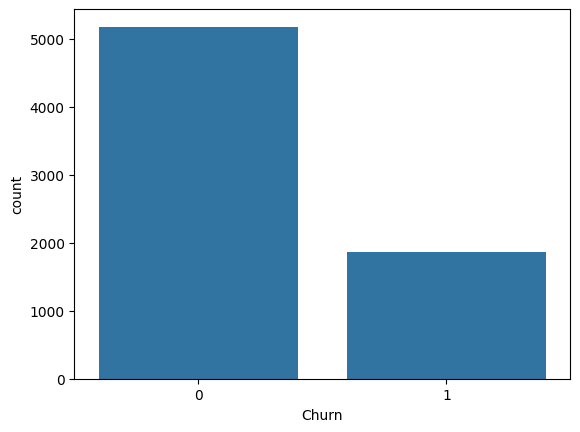

In [57]:
# We also have an imbalance between the amount of samples in the target
sns.barplot(df_num['Churn'].value_counts().reset_index(), y = "count", x='Churn')

### Model 2

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [60]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# We check the class balance

print("Antes de SMOTE:", y_train.value_counts())
print("Después de SMOTE:", y_train_smote.value_counts())

Antes de SMOTE: Churn
0    3622
1    1308
Name: count, dtype: int64
Después de SMOTE: Churn
0    3622
1    3622
Name: count, dtype: int64


In [61]:
#  We trained the second Logistic Regression model with the balanced Churn
model2 = LogisticRegression(random_state=42)
model2.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=42)

In [ ]:
y_test_pred = model2.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))

y_train_pred = model2.predict(X_train_smote)
train_score = accuracy_score(y_train_smote, y_train_pred)
y_test_pred = model2.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
difference = train_score - test_score

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Difference (Train - Test): {difference:.4f}")

roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

Confusion Matrix:
[[1130  422]
 [ 116  445]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.79      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

Train Score: 0.7782
Test Score: 0.7454
Difference (Train - Test): 0.0328
ROC-AUC: 0.7607


Using StandardScaler to scale the independent variables and applying SMOTE to the training set to balance the target classes, we can see a reduction in False Negative prediction but a worst result on False positive ones.

### Model 3

We will test a logarithmic transformation to help handle skewed distributions of MonthlyCharges and TotalCharges and analyze whether it will improve the relationship between these variables and the target.

In [63]:
# We add a small constant to avoid log(0), log(1 + x)

df_num['Log_TotalCharges'] = np.log1p(df_num['TotalCharges']) 
df_num['Log_MonthlyCharges'] = np.log1p(df_num['MonthlyCharges'])

print(df_num[['TotalCharges', 'Log_TotalCharges', 'MonthlyCharges', 'Log_MonthlyCharges']].head())

   TotalCharges  Log_TotalCharges  MonthlyCharges  Log_MonthlyCharges
0         29.85          3.429137           29.85            3.429137
1       1889.50          7.544597           56.95            4.059581
2        108.15          4.692723           53.85            4.004602
3       1840.75          7.518471           42.30            3.768153
4        151.65          5.028148           70.70            4.272491


In [64]:
# We apply StandardScaler to trasformed values
scaler = StandardScaler()
df_num[['Log_TotalCharges', 'Log_MonthlyCharges']] = scaler.fit_transform(df_num[['Log_TotalCharges', 'Log_MonthlyCharges']])

In [65]:
X = df_num.drop(columns=['Churn','TotalCharges','MonthlyCharges'])
y = df_num['Churn']

In [66]:
X.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   gender_Male                            7043 non-null   int64  
 7   MultipleLines_Yes                      7043 non-null   int64  
 8   InternetService_Fiber optic            7043 non-null   int64  
 9   InternetService_No                     7043 non-null   int64  
 10  OnlineSecurity_Yes                     7043 non-null   int64  
 11  Onli

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [68]:
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [69]:
#print("Dataset después de SMOTE:")
#print("X_train_smote shape:", X_train_smote.shape)
#print("y_train_smote distribution:", y_train_smote.value_counts())

In [70]:
# SMOTEENN
#smoteenn = SMOTEENN(random_state=42)
#X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

In [71]:
print("Dataset después de SMOTEENN:")
print("X_train_smote shape:", X_train.shape)
print("y_train_smote distribution:", y_train.value_counts())

Dataset después de SMOTEENN:
X_train_smote shape: (4930, 24)
y_train_smote distribution: Churn
0    3622
1    1308
Name: count, dtype: int64


In [72]:
model3 = LogisticRegression(random_state=42, max_iter=500)
model3.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [73]:
y_test_pred = model3.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))

#Verify the overfitting
y_train_pred = model3.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
y_test_pred = model3.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
difference = train_score - test_score

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Difference (Train - Test): {difference:.4f}")

roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

Confusion Matrix:
[[1408  144]
 [ 261  300]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.68      0.53      0.60       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Train Score: 0.8095
Test Score: 0.8083
Difference (Train - Test): 0.0012
ROC-AUC: 0.7210


The average accuracy of 0.7398 shows a considerable improvement compared to baseline, and a small step if we compare with Precision promedio: 0.72 on model2.

Now we are going to focus on the optimization of the hyperparameters, using a RandomizedSearchCV to find the best values for the hyperparameters. We use RandomizedSearchCV to explore a wider range of hyperparameters without spending as much time on computation.

### Model 4

In [74]:
X = df_num.drop(columns=['Churn','TotalCharges','MonthlyCharges'])
y = df_num['Churn']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
model_rs = LogisticRegression(random_state=42, max_iter=500)
model_rs.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [78]:
param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': uniform(0.01, 10),  # Valores continuos entre 0.01 y 10
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500]    
}

In [79]:
model4 = RandomizedSearchCV(
    estimator=model_rs,
    param_distributions=param_distributions,
    n_iter=50,  # Número de combinaciones a probar
    scoring='precision',  # Enfocándonos en precisión
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [80]:
model4.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/laraaldalur/Desktop/thebridge/2409_dsft_lara_core/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/laraaldalur/Desktop/thebridge/2409_dsft_lara_core/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/laraaldalur/Desktop/thebridge/2409_dsft_lara_core/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/laraaldalur/Desktop/thebridge/2409_dsft_lara_core/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/laraaldalur/Desktop/thebridge/2409_dsft_lara_core/.venv/lib/python3.9/site-packages/sklearn/linea

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=500, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1357b1940>,
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['liblinear', 'saga', 'lbfgs',
                                                   'newton-cg']},
                   random_state=42, scoring='precision', verbose=1)

In [81]:
print("Best Parameters:", model4.best_params_)
print("Best Cross-Validation Precision:", model4.best_score_)

Best Parameters: {'C': np.float64(1.1105192452767676), 'class_weight': None, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Precision: 0.6713714361998279


In [82]:
best_model = model4.best_estimator_

In [ ]:
y_test_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))

#Verify the overfitting
y_train_pred = best_model.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
y_test_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
difference = train_score - test_score

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Difference (Train - Test): {difference:.4f}")

roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

### Model 5

In [ ]:
model5 = LogisticRegression(
    # This parameters are takeng with F1 scoring preference.
    C= np.float64(0.5908361216819946), 
    class_weight= 'balanced', 
    max_iter= 100, 
    penalty= 'l2', 
    solver= 'newton-cg'
)

model5.fit(X_train_scaled, y_train)

LogisticRegression(C=np.float64(0.5908361216819946), class_weight='balanced',
                   solver='newton-cg')

In [ ]:
y_test_pred = model5.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))

#Verify the overfitting
y_train_pred = model5.predict(X_train_scaled)
train_score = accuracy_score(y_train, y_train_pred)
y_test_pred = model5.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_test_pred)
difference = train_score - test_score

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Difference (Train - Test): {difference:.4f}")

roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC: {roc_auc:.4f}")


Confusion Matrix:
[[1192  360]
 [ 179  382]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1552
           1       0.51      0.68      0.59       561

    accuracy                           0.74      2113
   macro avg       0.69      0.72      0.70      2113
weighted avg       0.78      0.74      0.75      2113

Train Score: 0.7584
Test Score: 0.7440
Difference (Train - Test): 0.0145
ROC-AUC: 0.7620


/Users/laraaldalur/Desktop/thebridge/2409_dsft_lara_core/.venv/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Threshold optimization

We analyse the recall-precision curve to see the optimal barrier for the thresholds.

In [105]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate accuracy, recall and corresponding thresholds
y_scores_positive = model5.predict_proba(X_test)[:, 1]
y_scores_negative = model5.predict_proba(X_test)[:, 0]

/Users/laraaldalur/Desktop/thebridge/2409_dsft_lara_core/.venv/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/laraaldalur/Desktop/thebridge/2409_dsft_lara_core/.venv/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [106]:
# Precision-Recall curve for the positive class
precision_pos, recall_pos, _ = precision_recall_curve(y_test, y_scores_positive)
average_precision_pos = average_precision_score(y_test, y_scores_positive)

# Precision-Recall Curve for the negative class
precision_neg, recall_neg, _ = precision_recall_curve(1 - y_test, y_scores_negative)
average_precision_neg = average_precision_score(1 - y_test, y_scores_negative)

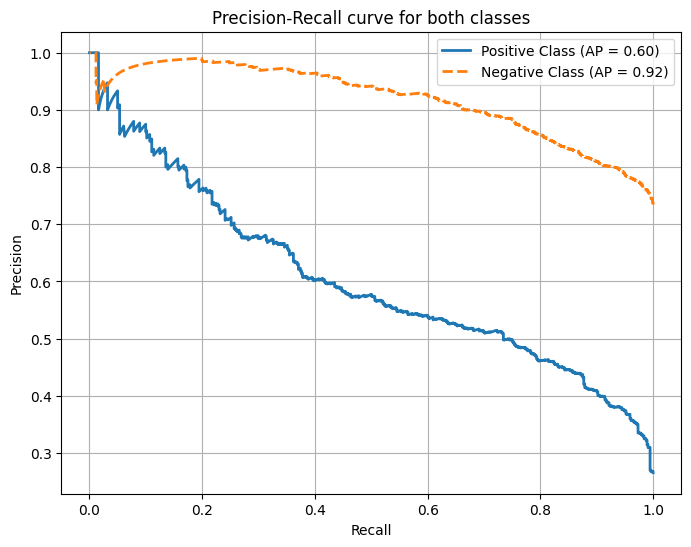

In [107]:
# Graph both curves
plt.figure(figsize=(8, 6))
plt.plot(recall_pos, precision_pos, label=f'Positive Class (AP = {average_precision_pos:.2f})', linewidth=2)
plt.plot(recall_neg, precision_neg, label=f'Negative Class (AP = {average_precision_neg:.2f})', linewidth=2, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for both classes')
plt.legend()
plt.grid()
plt.show()

The biggest challenge in an unbalanced dataset is balancing precision and recall, as seen in the difference in the areas under the curve between the classes.

In [108]:
# Finding the optimal threshold using the F1-Score
# Calcular F1-Score
f1_scores = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos + 1e-6)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f"The optimum point for the positive class is at the threshold.: {best_threshold:.2f}")
print(f"F1-Score maximum: {f1_scores[best_index]:.2f}")

The optimum point for the positive class is at the threshold.: 0.47
F1-Score maximum: 0.60


In [109]:
# We tested the threshold recommended by the Precision-Recall curve in model 5

y_test_pred = (model5.predict_proba(X_test_scaled)[:, 1] >= 0.40).astype(int)

cm = confusion_matrix(y_test, y_test_pred)

print(cm)
print(classification_report(y_test, y_test_pred))

y_train_pred = (model5.predict_proba(X_train_scaled)[:, 1] >= 0.47).astype(int)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)
difference = train_score - test_score

print(f"\nTrain Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Difference (Train - Test): {difference:.4f}")

roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

[[1010  542]
 [  70  491]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1552
           1       0.48      0.88      0.62       561

    accuracy                           0.71      2113
   macro avg       0.71      0.76      0.69      2113
weighted avg       0.81      0.71      0.73      2113


Train Score: 0.7428
Test Score: 0.7104
Difference (Train - Test): 0.0324
ROC-AUC: 0.7630


There is no significant improvement by changing the threshold. So we tried other options to reach a balance of prediction between the classes.

### Model 6

In [110]:
X = df_num.drop(columns=['Churn','TotalCharges','MonthlyCharges'])
y = df_num['Churn']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [112]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador para estandarizar los datos
    ('model', LogisticRegression(
        solver='liblinear', 
        penalty='l1', 
        max_iter=100, 
        C=0.01, 
        random_state=42
    ))  # Modelo con los mejores hiperparámetros
])

In [113]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [114]:
y_test_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))

#Verify the overfitting
y_train_pred = pipeline.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
y_test_pred = pipeline.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
difference = train_score - test_score

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Difference (Train - Test): {difference:.4f}")

roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

Confusion Matrix:
[[1428  124]
 [ 289  272]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.69      0.48      0.57       561

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Train Score: 0.8014
Test Score: 0.8045
Difference (Train - Test): -0.0031
ROC-AUC: 0.7025
